In [ ]:
import QuantumToolbox as qt
import CairoMakie as cm
import SuperconductingCavities as SC

In [3]:
Mode3 = SC.Circuits.Transmon_Resonators.load("ModelSaves/Mode3/Mode3.json");

In [4]:
Ramp_Times = vcat(collect(LinRange(0.001, 20-0.001, 100)),collect(LinRange(20, 100, 80)))
envelopes = ["Sine_Squared_Ramp", "Gaussian_Ramp"]
chirped = [true, false]

res = Dict{Any, Any}()

for envelope in envelopes
    for rt in Ramp_Times
        for chirp in chirped
            drive_name = ""
            if envelope == "Sine_Squared_Ramp"
                drive_name = "f0g1_SS_"*string(rt)
            end
            if envelope == "Gaussian_Ramp"
                drive_name = "f0g1_G_"*string(rt)
            end

            if chirp
                drive_name = drive_name*"_chirped"
            end

            if drive_name in keys(Mode3.Stuff["op_drive_params"])
                res[drive_name] = Mode3.Stuff["op_drive_params"][drive_name]["accuracy"]
            end
        end
    end
end
SS = []
SS_x = []
SS_chirp = []
SS_chirp_x = []

G = []
G_x = []
G_chirp = []
G_chirp_x = []

for key in keys(res)
    key_split = split(key, "_")
    if length(key_split) == 4
        if key_split[2] == "SS"
            push!(SS_chirp, res[key])
            push!(SS_chirp_x, Meta.parse(key_split[3]))
        end
        if key_split[2] == "G"
            push!(G_chirp, res[key])
            push!(G_chirp_x, Meta.parse(key_split[3]))
        end
    else
        if key_split[2] == "SS"
            push!(SS, res[key])
            push!(SS_x, Meta.parse(key_split[3]))
        end
        if key_split[2] == "G"
            push!(G, res[key])
            push!(G_x, Meta.parse(key_split[3]))
        end
    end
end

permvec = sortperm(SS_x)
SS = SS[permvec]
SS_x = sort(SS_x)

permvec = sortperm(SS_chirp_x)
SS_chirp = SS_chirp[permvec]
SS_chirp_x = sort(SS_chirp_x)

permvec = sortperm(G_x)
G = G[permvec]
G_x = sort(G_x)

permvec = sortperm(G_chirp_x)
G_chirp = G_chirp[permvec]
G_chirp_x = sort(G_chirp_x);

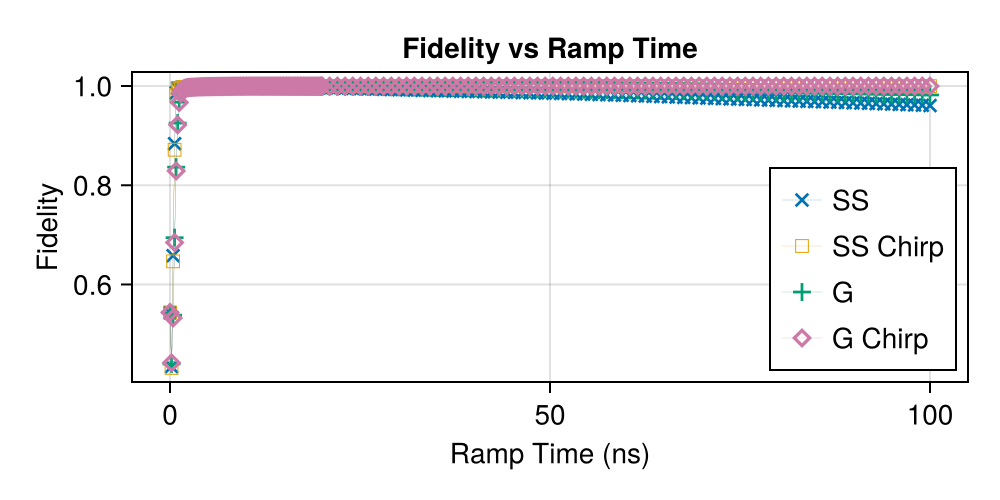

In [6]:
f = cm.Figure(size = (500, 250), px_per_unit = 8)
ax = cm.Axis(f[1,1], title = "Fidelity vs Ramp Time", xlabel = "Ramp Time (ns)", ylabel = "Fidelity")

cm.scatterlines!(ax, SS_x, SS, marker = '×', label = "SS", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, SS_chirp_x, SS_chirp, marker = '□', label = "SS Chirp", linewidth = 0.1)
cm.scatterlines!(ax, G_x, G, marker = '+', label = "G", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, G_chirp_x, G_chirp, marker = '⋄', markersize = 20, label = "G Chirp", linewidth = 0.1)
cm.axislegend(ax, position = :rb)

cm.display(f);

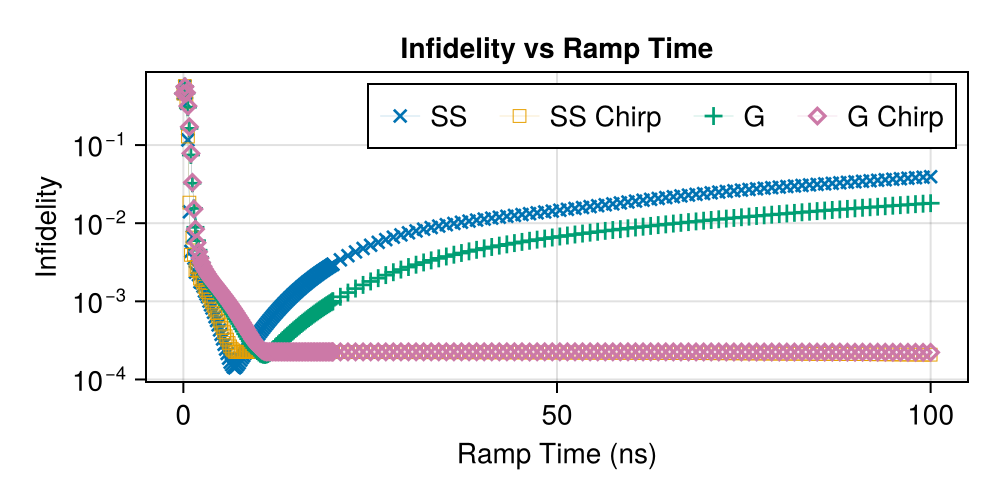

In [8]:
f = cm.Figure(size = (500, 250), px_per_unit = 8)
ax = cm.Axis(f[1,1], yscale = cm.log10, title = "Infidelity vs Ramp Time", xlabel = "Ramp Time (ns)", ylabel = "Infidelity")

cm.scatterlines!(ax, SS_x, -(SS.-1), marker = '×', label = "SS", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, SS_chirp_x, -(SS_chirp.-1), marker = '□', label = "SS Chirp", linewidth = 0.1)
cm.scatterlines!(ax, G_x, -(G.-1), marker = '+', label = "G", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, G_chirp_x, -(G_chirp.-1), marker = '⋄', markersize = 20, label = "G Chirp", linewidth = 0.1)
cm.axislegend(ax, position = :rt, orientation = :horizontal)

cm.display(f);